In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
heart_df= pd.read_csv('heartdisease_data.csv')

In [5]:
heart_df

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [6]:
heart_df.columns = ["age",
"sex",
"cp",
"trestbps",
"chol",
"fbs",
"restecg",
"thalach",
"exang",
"oldpeak",
"slope",
"ca",
"thal",
"num"]

In [7]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [8]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [9]:
heart_df.num.unique()

array([0, 2, 1, 3, 4], dtype=int64)

*we Just have to predict presence(values 1,2,3,4) or absence (0), Thus we will convert values into 1 (presence) and 0 (absence)*

In [10]:
heart_df.num = heart_df.num.replace([1, 2, 3, 4],1)

In [11]:
heart_df.num.unique()

array([0, 1], dtype=int64)

Values are now converted to presence(1) and absence(0) 

In [12]:
heart_df.describe

<bound method NDFrame.describe of      age  sex  cp trestbps chol fbs  restecg thalach exang oldpeak slope ca  \
0     44    1   4      130  209   0        1     127     0       0     ?  ?   
1     60    1   4      132  218   0        1     140     1     1.5     3  ?   
2     55    1   4      142  228   0        1     149     1     2.5     1  ?   
3     66    1   3      110  213   1        2      99     1     1.3     2  ?   
4     66    1   3      120    0   0        1     120     0    -0.5     1  ?   
..   ...  ...  ..      ...  ...  ..      ...     ...   ...     ...   ... ..   
194   54    0   4      127  333   1        1     154     0       0     ?  ?   
195   62    1   1        ?  139   0        1       ?     ?       ?     ?  ?   
196   55    1   4      122  223   1        1     100     0       0     ?  ?   
197   58    1   4        ?  385   1        2       ?     ?       ?     ?  ?   
198   62    1   2      120  254   0        2      93     1       0     ?  ?   

    thal  num  
0

In [13]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Above data description indicates that dataset has 199 rows, 14 columns. Data set does not have any null values.

In [14]:
heart_df.ca.value_counts()

?    197
0      2
Name: ca, dtype: int64

In [15]:
heart_df['ca'].value_counts()

?    197
0      2
Name: ca, dtype: int64

In [16]:
l = heart_df.columns
for i in l:
    if "?" in heart_df[str(i)].unique():
        
        print(i + " contains ",heart_df[str(i)].isin(['?']).sum(axis=0)," '?' Values ")

trestbps contains  56  '?' Values 
chol contains  7  '?' Values 
fbs contains  7  '?' Values 
thalach contains  53  '?' Values 
exang contains  53  '?' Values 
oldpeak contains  56  '?' Values 
slope contains  102  '?' Values 
ca contains  197  '?' Values 
thal contains  165  '?' Values 


Above observation informs that 

> trestbps contains  56  '?' Values 
chol contains  7  '?' Values 
fbs contains  7  '?' Values 
thalach contains  53  '?' Values 
exang contains  53  '?' Values 
oldpeak contains  56  '?' Values 
slope contains  102  '?' Values 
ca contains  197  '?' Values 
thal contains  165  '?' Values 

Since *ca* column have almost all values as *?* , Thus we drop *ca* and proceed with remaning data 

In [17]:
heart_df = heart_df.drop("ca",axis=1)

In [18]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,44,1,4,130,209,0,1,127,0,0,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,1
2,55,1,4,142,228,0,1,149,1,2.5,1,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,0


In [19]:
thal_data = heart_df[heart_df.thal != "?"]["thal"]
thal_data.head()

11    3
18    7
24    6
27    7
36    7
Name: thal, dtype: object

In [20]:
thal_data.median()

7.0

In [21]:
heart_df.thal = heart_df.thal.replace(["?","7"],7)
heart_df.thal = heart_df.thal.astype('float64')

In [22]:
heart_df.thal.value_counts()

7.0    187
6.0      8
3.0      4
Name: thal, dtype: int64

Thal is cleaned

In [23]:
heart_df.slope.unique()

array(['?', '3', '1', '2'], dtype=object)

In [24]:
heart_df.slope.value_counts()

?    102
2     52
3     29
1     16
Name: slope, dtype: int64

In [25]:
slope_data = heart_df[heart_df.slope != "?"]["slope"]

In [26]:
slope_data.mean()

3.217744559096001e+94

In [27]:
heart_df.slope = heart_df.slope.replace("?",3.21)

In [28]:
heart_df.slope = heart_df.slope.astype('float64')

In [29]:
heart_df.slope.value_counts()

3.21    102
2.00     52
3.00     29
1.00     16
Name: slope, dtype: int64

Slope is clear

In [30]:
li = ["trestbps","chol","fbs","thalach","exang","oldpeak" ]
for i in li:
    heart_df[str(i)].unique()
    heart_df[str(i)].value_counts()
    col_data = heart_df[heart_df[str(i)] != "?"][[str(i)]]
    col_data.median()
    heart_df[str(i)] = heart_df[str(i)].replace("?",int(col_data.median()))
    heart_df[str(i)] = heart_df[str(i)].astype('float64')
    heart_df[str(i)].value_counts()
    print(str(i)+ " Is cleaned")

trestbps Is cleaned
chol Is cleaned
fbs Is cleaned
thalach Is cleaned
exang Is cleaned
oldpeak Is cleaned


In [31]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [32]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       199 non-null    int64  
 1   sex       199 non-null    int64  
 2   cp        199 non-null    int64  
 3   trestbps  199 non-null    float64
 4   chol      199 non-null    float64
 5   fbs       199 non-null    float64
 6   restecg   199 non-null    int64  
 7   thalach   199 non-null    float64
 8   exang     199 non-null    float64
 9   oldpeak   199 non-null    float64
 10  slope     199 non-null    float64
 11  thal      199 non-null    float64
 12  num       199 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 20.3 KB


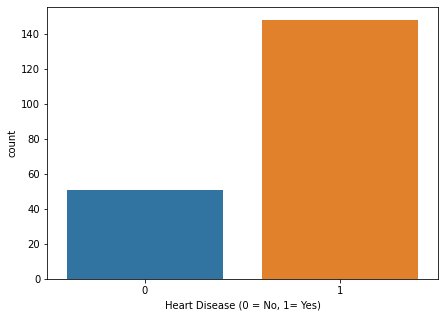

In [33]:
plt.figure(figsize=(7,5)) 
sns.countplot(x="num", data=heart_df)
plt.xlabel("Heart Disease (0 = No, 1= Yes)")
plt.show()

Above observation shows that Maximum people have heart disease

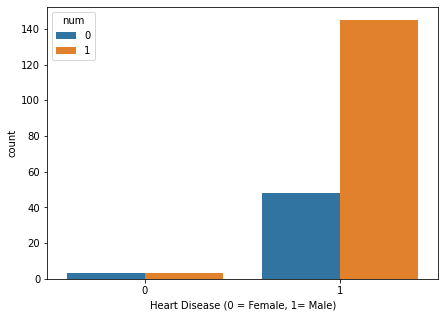

In [34]:
plt.figure(figsize=(7,5)) 
sns.countplot(x="sex", data=heart_df, hue="num")
plt.xlabel("Heart Disease (0 = Female, 1= Male)")
plt.show()

Above observation states that in this data-chunk maximum Males have Heart disease

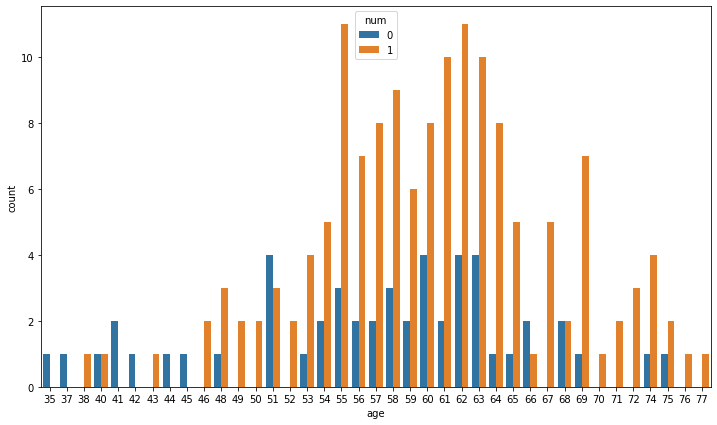

In [35]:
plt.figure(figsize=(12,7)) 
sns.countplot(x="age", data=heart_df, hue="num")
plt.show()

Above observation states that in this data-chunk People between age of 52-70 have highest chances of having heart disease

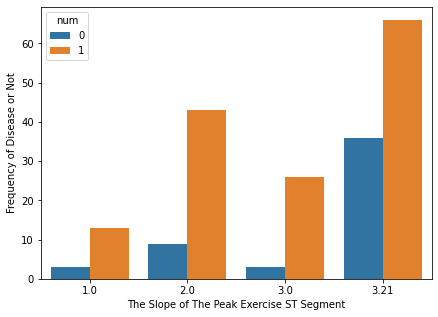

In [36]:
plt.figure(figsize=(7,5)) 
sns.countplot(x="slope", data=heart_df, hue="num")
plt.xlabel('The Slope of The Peak Exercise ST Segment')
plt.ylabel('Frequency of Disease or Not')
plt.show()

Above observation states that in this data-chunk Maximum share is of 3.21 slope candidate as we have replaced the missing values with mean i.e 3.21

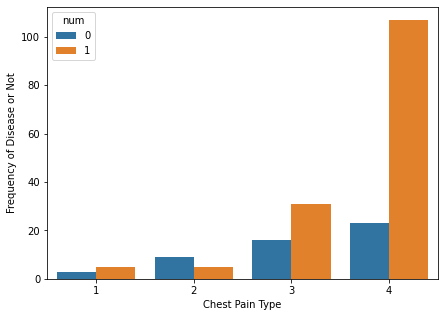

In [37]:
plt.figure(figsize=(7,5)) 
sns.countplot(x="cp", data=heart_df, hue="num")
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency of Disease or Not')
plt.show()

Above observation states that in this data-chunk person with type 4 chest pain have highest chance of having heart disease

<AxesSubplot:>

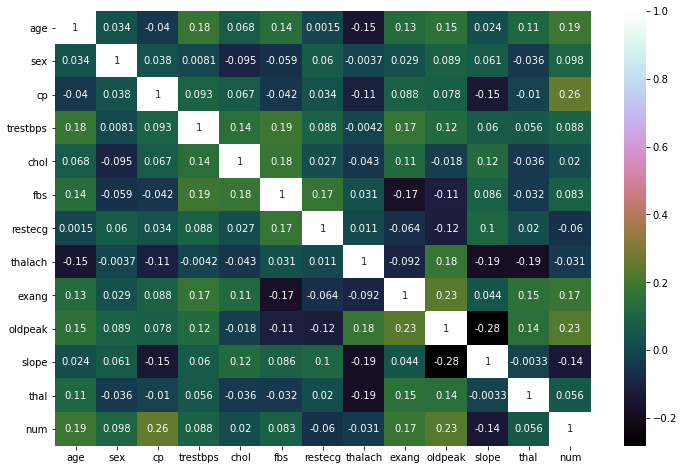

In [38]:
corr = heart_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="cubehelix", annot=True)

In [39]:
heart_df_copy = heart_df

In [40]:
heart_df_copy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,3.21,7.0,0
1,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.00,7.0,1
2,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.00,7.0,1
3,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.00,7.0,0
4,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.00,7.0,0


In [41]:
heart_df_copy.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,59.331658,0.969849,3.502513,132.673367,179.648241,0.341709,0.733668,122.105528,0.738693,1.222111,2.685528,6.879397,0.743719
std,7.827080,0.171433,0.796928,18.374852,112.360472,0.475479,0.684918,18.910312,0.440455,0.942816,0.713572,0.590777,0.437680
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,3.000000,0.000000
25%,55.000000,1.000000,3.000000,125.500000,119.500000,0.000000,0.000000,112.000000,0.000000,1.000000,2.000000,7.000000,0.000000
50%,60.000000,1.000000,4.000000,130.000000,216.000000,0.000000,1.000000,120.000000,1.000000,1.000000,3.210000,7.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.000000,1.000000,1.000000,130.000000,1.000000,2.000000,3.210000,7.000000,1.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.210000,7.000000,1.000000


In [42]:
X = heart_df_copy.drop(['num'], axis = 1)
Y = heart_df_copy['num']

In [43]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(X)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 15)

In [45]:
x_train.shape, x_test.shape

((139, 12), (60, 12))

In [46]:
y_train.shape, y_test.shape

((139,), (60,))

### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [48]:
y_pred = logreg.predict(x_test)

<AxesSubplot:>

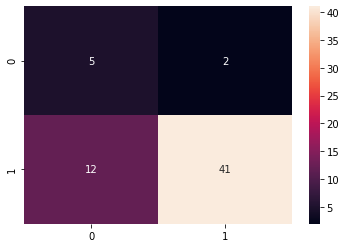

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm,annot=True)

In [50]:
logreg_acc = accuracy_score(y_pred, y_test)
logreg_acc

0.7666666666666667

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.29      0.42        17
           1       0.77      0.95      0.85        43

    accuracy                           0.77        60
   macro avg       0.74      0.62      0.64        60
weighted avg       0.76      0.77      0.73        60



#### Logistic Regression Gives accuracy of 76.6 Percent

### Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=150)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150)

In [53]:
predict=rfc.predict(x_test)
rfc_acc = accuracy_score(y_test,predict)
rfc_acc

0.75

In [54]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.62      0.29      0.40        17
           1       0.77      0.93      0.84        43

    accuracy                           0.75        60
   macro avg       0.70      0.61      0.62        60
weighted avg       0.73      0.75      0.72        60



<AxesSubplot:>

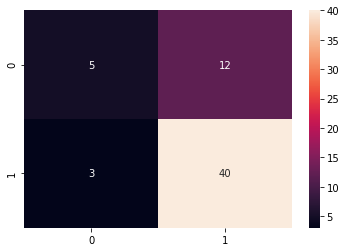

In [55]:
cm = confusion_matrix(y_test,predict)
sns.heatmap(cm,annot=True)

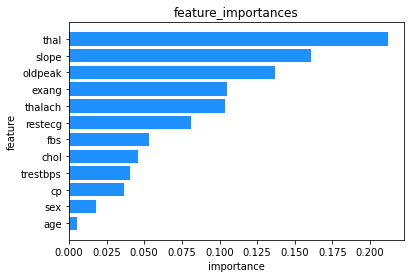

In [58]:
feature_importance = rfc.feature_importances_
feat_importances = pd.Series(rfc.feature_importances_, index=heart_df.columns[:-1])
feat_importances = feat_importances.nlargest(13)

feature = heart_df.columns.values.tolist()[0:-1]
importance = sorted(rfc.feature_importances_.tolist())


x_pos = [i for i, _ in enumerate(feature)]

plt.barh(x_pos, importance , color='dodgerblue')
plt.ylabel("feature")
plt.xlabel("importance")
plt.title("feature_importances")

plt.yticks(x_pos, feature)

plt.show()

#### Random Forest Classifier Gives accuracy of 75 Percent

### Support Vector Classifier

In [67]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(y_test,predict)
svc_acc

0.75

In [60]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.72      1.00      0.83        43

    accuracy                           0.72        60
   macro avg       0.36      0.50      0.42        60
weighted avg       0.51      0.72      0.60        60



In [61]:
acc_chart = pd.DataFrame({"m" :["Logistic Regression", "Random Forest Classifier","SVC"],
"acc" : [logreg_acc,rfc_acc,svc_acc]})
acc_chart.sort_values('acc', ascending=False)

,m,acc
0,Logistic Regression,0.766667
1,Random Forest Classifier,0.750000
2,SVC,0.750000


#### HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['poly', 'sigmoid', 'rbf']} 

svm = SVC()
svm_search = GridSearchCV(svm, svm_grid, cv=3, return_train_score=True, n_jobs=-1, verbose=4)
svm_search.fit(x_train, y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:  1.4min


In [ ]:
svm_search.best_params_